In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras


In [ ]:
# Load the water quality dataset
df = pd.read_csv("/content/water_potability.csv")

In [ ]:
# Display column names, their length, and data type
for i, column in enumerate(df.columns, 1):
    print(f"{i}. Name: {column}, Length: {len(df[column])}, Data Type: {df[column].dtype}")
    print("="*50)


1. Name: ph, Length: 3276, Data Type: float64
2. Name: Hardness, Length: 3276, Data Type: float64
3. Name: Solids, Length: 3276, Data Type: float64
4. Name: Chloramines, Length: 3276, Data Type: float64
5. Name: Sulfate, Length: 3276, Data Type: float64
6. Name: Conductivity, Length: 3276, Data Type: float64
7. Name: Organic_carbon, Length: 3276, Data Type: float64
8. Name: Trihalomethanes, Length: 3276, Data Type: float64
9. Name: Turbidity, Length: 3276, Data Type: float64
10. Name: Potability, Length: 3276, Data Type: int64


In [ ]:
# Feature selection and target variable
features = ["ph", "Hardness", "Solids", "Chloramines", "Sulfate", "Conductivity", "Organic_carbon", "Trihalomethanes", "Turbidity"]
target = "Potability"


In [ ]:
# Exploratory Data Analysis (EDA)
# Summary statistics
print(df.describe())

                ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  


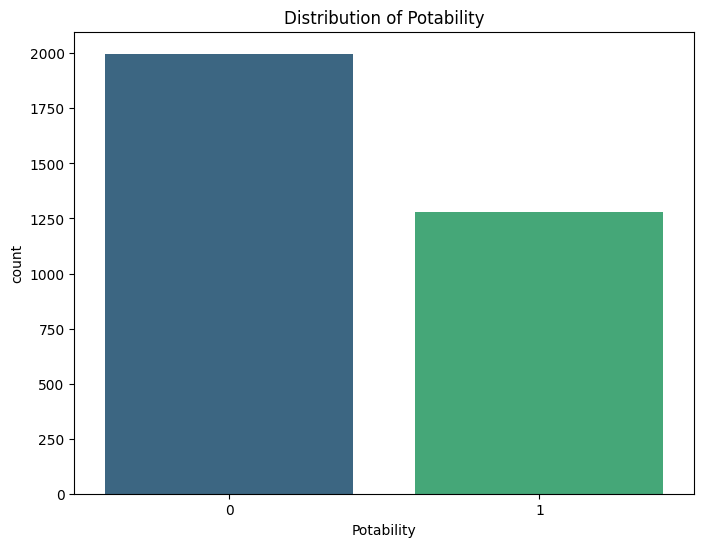

In [ ]:
# Distribution of Potability using Seaborn
plt.figure(figsize=(8, 6))
sns.countplot(x='Potability', data=df, palette='viridis')
plt.title('Distribution of Potability')
plt.show()

Number of missing values for each column:
ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


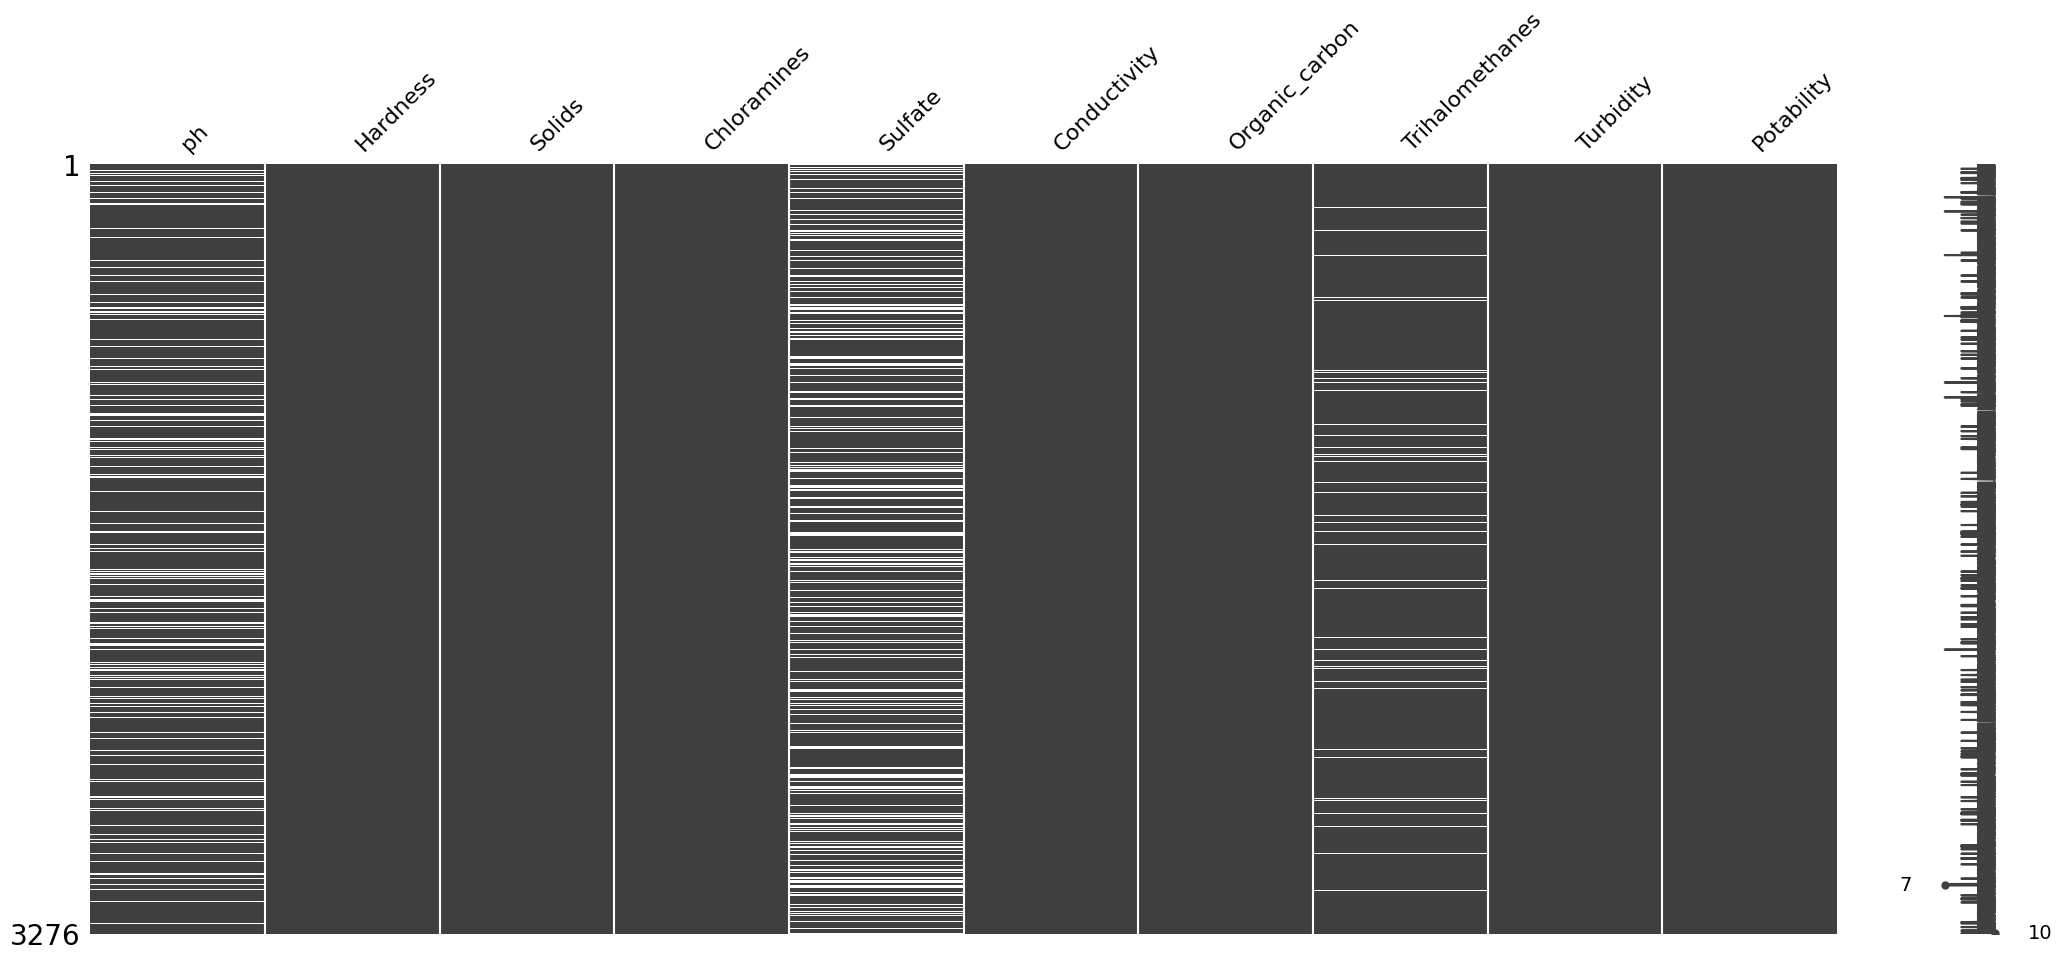

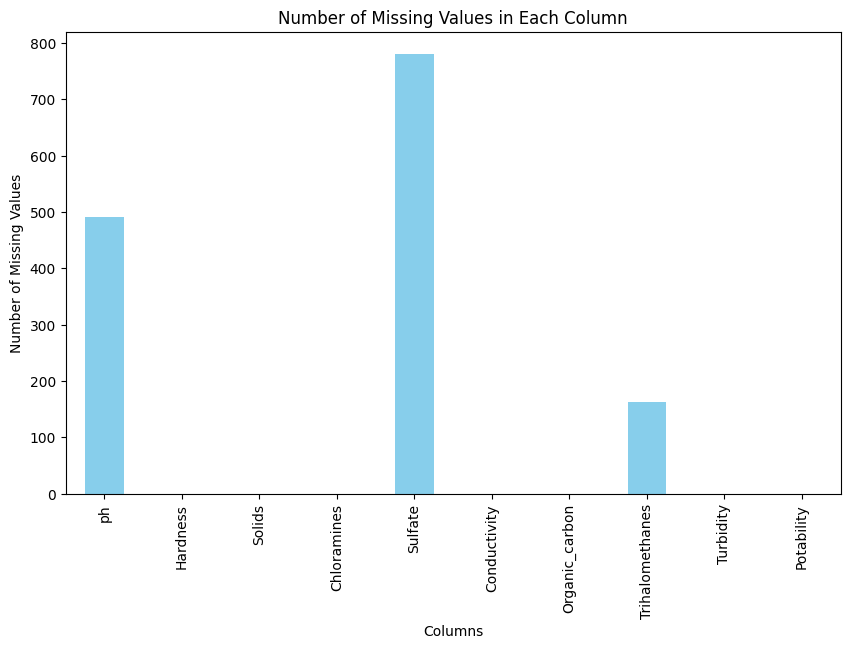

In [ ]:
import missingno as msno
import matplotlib.pyplot as plt

# Print the number of missing values for each column
missing_values = df.isnull().sum()
print("Number of missing values for each column:")
print(missing_values)

# Visualize missing values using missingno.matrix
msno.matrix(df)
plt.show()
# Display the number of missing values in each column
missing_values_count = df.isnull().sum()
plt.figure(figsize=(10, 6))
missing_values_count.plot(kind='bar', color='skyblue')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.title('Number of Missing Values in Each Column')
plt.show()


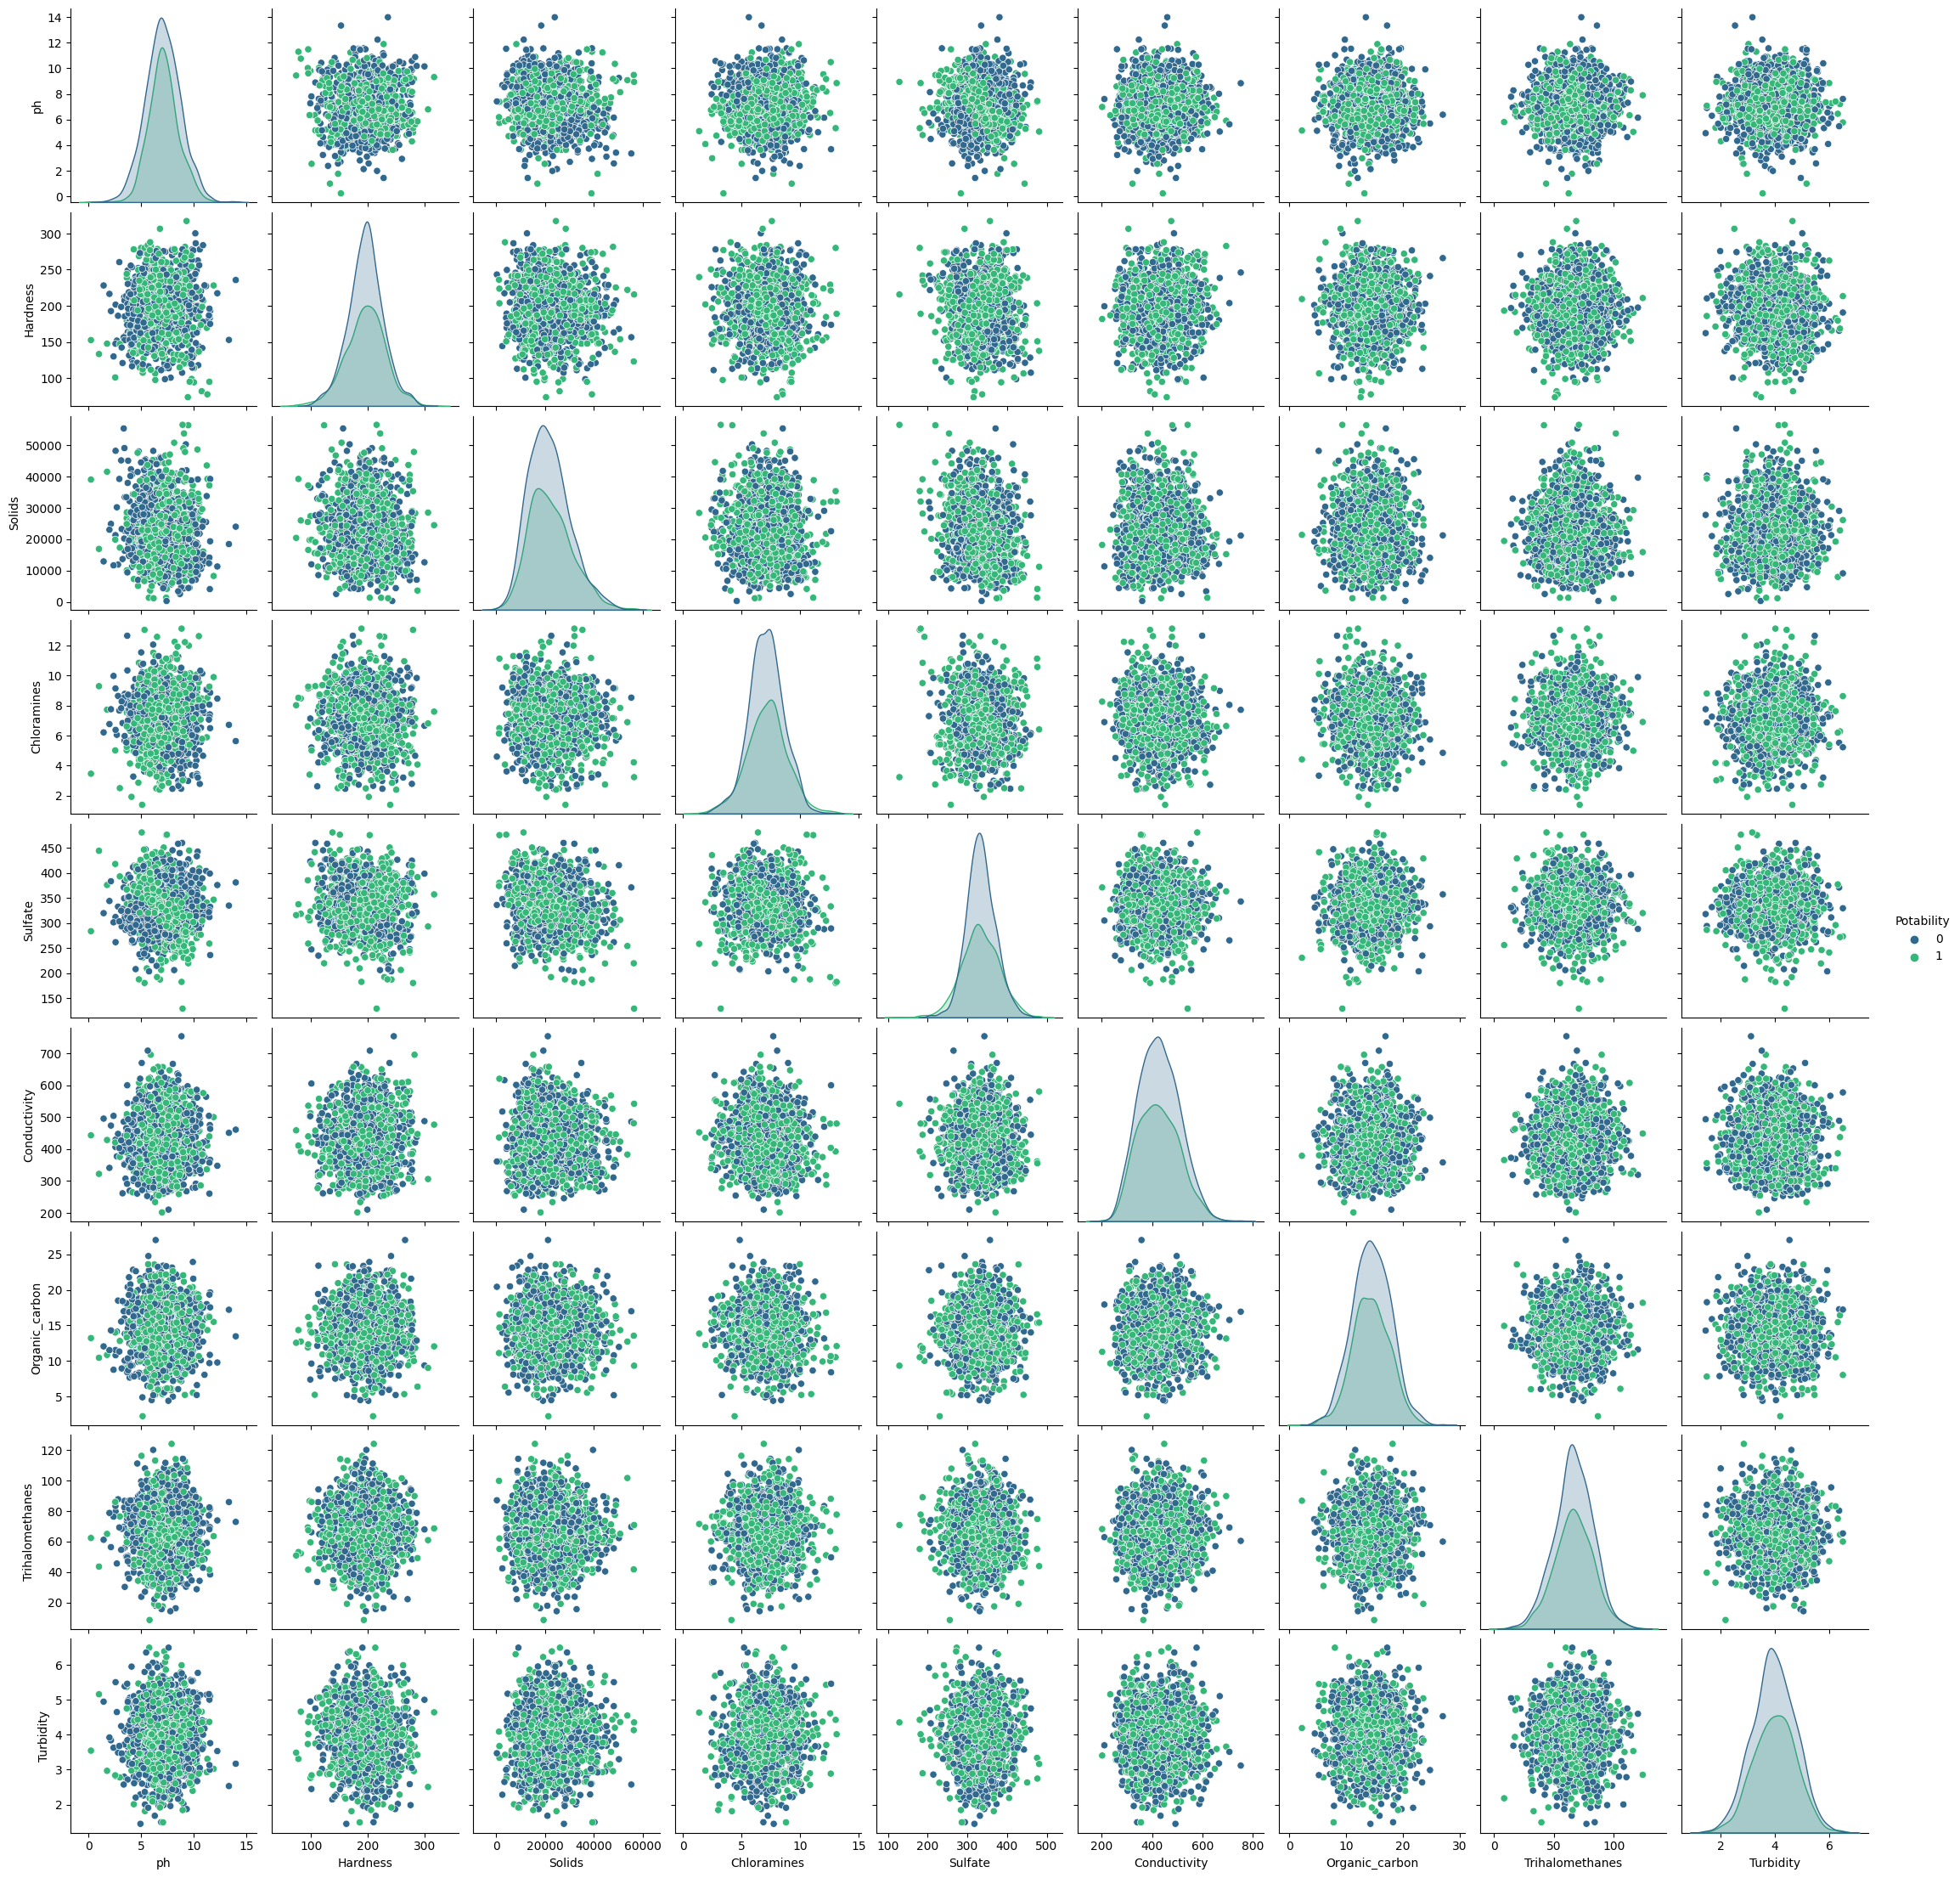

In [ ]:
# Pair plot for feature visualization
df_cleaned = df.dropna(subset=features + [target])
sns.pairplot(df_cleaned, hue=target, palette='viridis')
plt.show()

In [ ]:
df=df.dropna()
def Outliers(column):
    q1=column.quantile(0.25)
    q3=column.quantile(0.75)
    IQR=q3-q1
    lower=q1-1.5*(IQR)
    upper=q3+1.5*(IQR)
    return column[(column<lower) | (column>upper)]



In [ ]:
outliers_dict = {}
for column in df.select_dtypes(include=['number']):
    outliers = Outliers(df[column])
    if not outliers.empty:
        outliers_dict[column] = outliers

# Print potential outliers for each column
for column, outliers in outliers_dict.items():
    print(f"Potential outliers in column '{column}':")
    print(outliers)

Potential outliers in column 'ph':
9       11.180284
317     11.301794
692      1.757037
726      0.227499
783     11.898078
810      0.989912
1023    11.027880
1162    11.244507
1231     2.690831
1303    12.246928
1343     2.569244
1353    11.534880
2075    14.000000
2096    11.568768
2165     2.803563
2189     2.558103
2263    11.235426
2300     2.974429
2343     2.538116
2681     2.376768
2895    13.349889
2899     1.431782
2925    11.563169
2932     2.925174
2945    11.496702
2993     3.102076
3017    11.496859
3088     2.128531
3094     1.985383
3108    11.449739
3269    11.491011
Name: ph, dtype: float64
Potential outliers in column 'Hardness':
51      100.457615
71      116.299330
88      300.292476
180     278.056321
189     112.299485
218     276.733569
227     112.820254
258      98.771644
260     280.082411
262     278.585105
275     280.089655
278      81.710895
309     113.831112
317      77.459586
335      94.091307
342     282.739017
346     278.147524
379      73.492234

In [ ]:
def replaceOut(column):
    q1=column.quantile(0.25)
    q3=column.quantile(0.75)
    IQR=q3-q1
    lower=q1-1.5*(IQR)
    upper=q3+1.5*(IQR)
    outliers=column[(column<=lower) | (column>=upper)]
    if not outliers.empty:
        column[outliers.index] = column.mean()
    return column

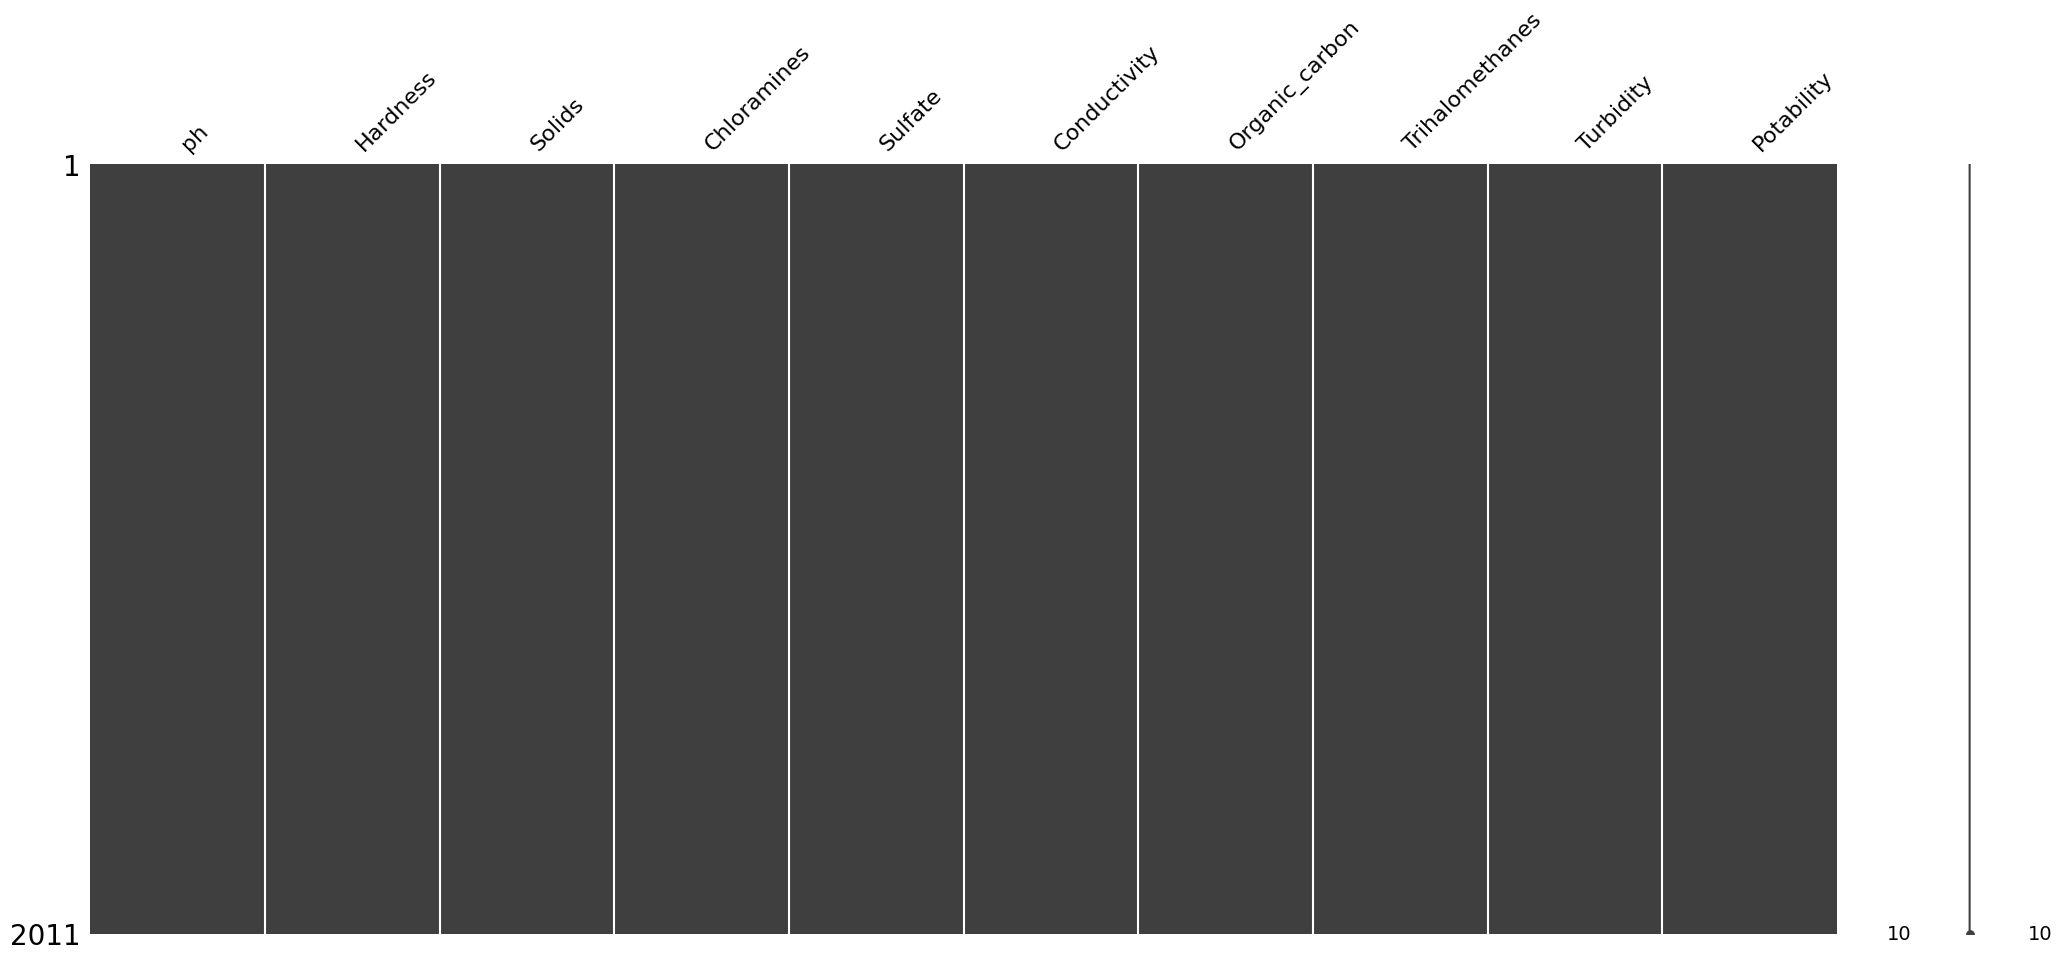

In [ ]:
import missingno as msno
import matplotlib.pyplot as plt
msno.matrix(df)
plt.show()

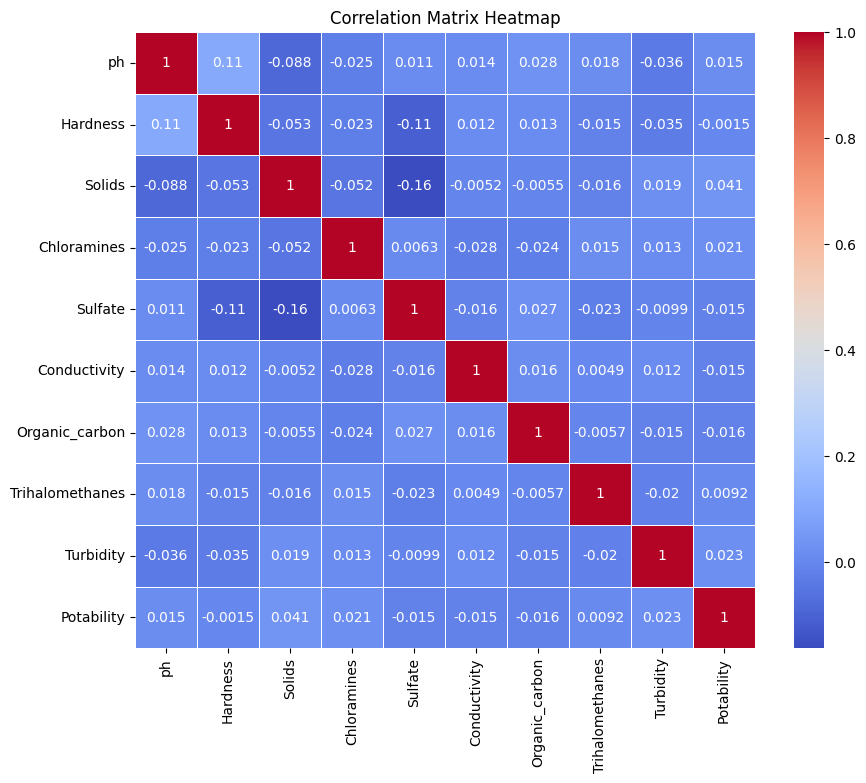

In [ ]:
# Correlation matrix heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=True, linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
X=df.drop('Potability',axis=1)
Y=df['Potability']

In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

normalizer=MinMaxScaler()
standardizer=StandardScaler()
X= normalizer.fit_transform(X)
X=standardizer.fit_transform(X)
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.4,random_state=62)

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score
from tensorflow import keras
from tensorflow.keras import layers


# create instances of all models
models = {
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine':  SVC(
    kernel='rbf',
    degree=3,
    C=1.0,
    gamma='scale',
    coef0=0.0,
    probability=True,
    random_state=42
     ),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(
     criterion='gini',
     splitter='best',
     max_depth=None,
     min_samples_split=2,
     min_samples_leaf=3,
     max_features=None,
     random_state=42  )   ,
    'Random Forest': RandomForestClassifier(
     n_estimators=100,
     criterion='gini',
     max_depth=None,
     min_samples_split=2,
     min_samples_leaf=1,
     max_features='auto',
     random_state=42,
     n_jobs=-1
     ),
    'AdaBoost': AdaBoostClassifier(n_estimators=50,learning_rate=.05,algorithm='SAMME.R'),
    'Ann model': keras.Sequential([
        layers.Dense(24, activation='relu', input_shape=(X_train.shape[1],)),
        layers.Dense(12, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
}

for name, model in models.items():
    if name == 'Ann model':
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        model.fit(X_train, Y_train, epochs=20, batch_size=32, verbose=0)
        y_pred_prob = model.predict(X_test)
        y_pred_binary = (y_pred_prob > 0.5).astype(int)
    else:
        model.fit(X_train, Y_train)
        y_pred_prob = model.predict_proba(X_test)[:, 1]
        y_pred_binary = model.predict(X_test)

    acc = accuracy_score(Y_test, y_pred_binary)
    print(f"{name} with accuracy: {acc}")


Naive Bayes with accuracy: 0.6521739130434783
Support Vector Machine with accuracy: 0.6931677018633541
K-Nearest Neighbors with accuracy: 0.6447204968944099
Decision Tree with accuracy: 0.5801242236024845


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Random Forest with accuracy: 0.6819875776397516
AdaBoost with accuracy: 0.6385093167701863
26/26 [==============================] - 0s 3ms/step
Ann model with accuracy: 0.6906832298136646


26/26 [==============================] - 0s 2ms/step


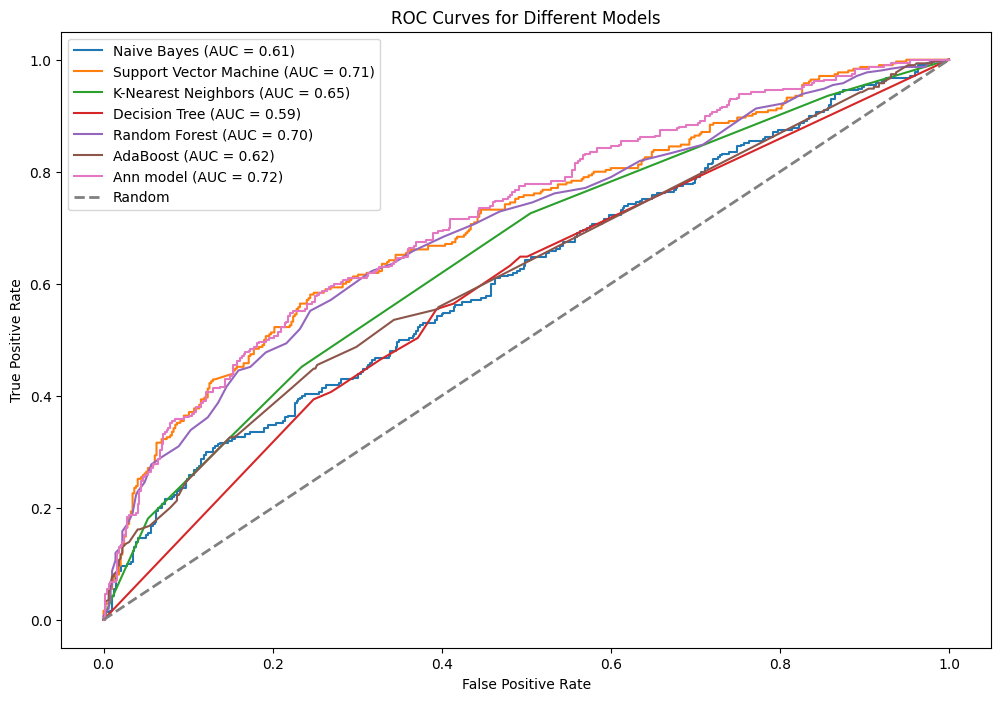

In [ ]:
from sklearn.metrics import roc_curve, auc

# Plot ROC curves for each model
plt.figure(figsize=(12, 8))
for name, md in models.items():
    if name == 'Ann model':
        y_score = md.predict(X_test)
    else:
        y_score = md.predict_proba(X_test)[:, 1]

    fpr, tpr, _ = roc_curve(Y_test, y_score)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=2, label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend()
plt.show()

19/19 [==============================] - 0s 2ms/step


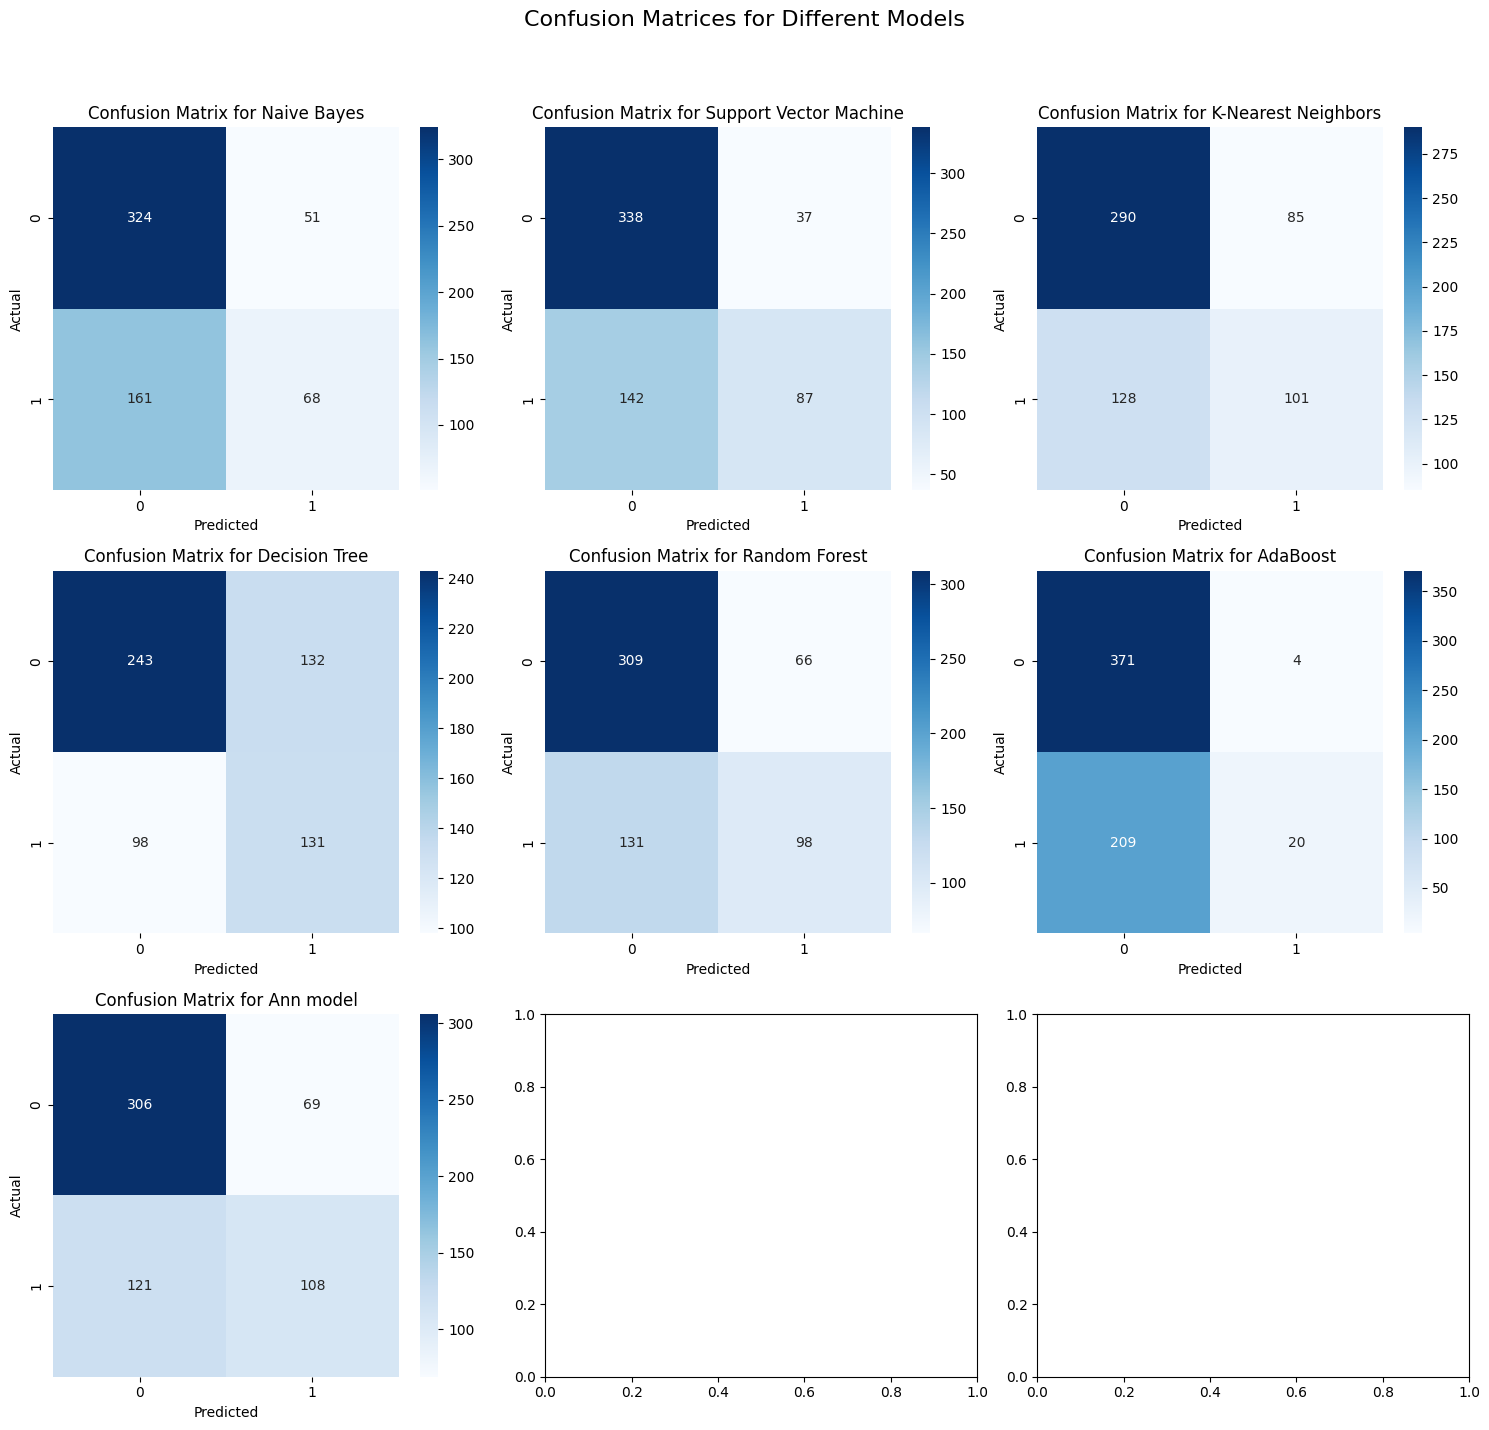

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Set up a grid for subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
fig.suptitle('Confusion Matrices for Different Models', fontsize=16)

# Flatten the 2D array of subplots for easier indexing
axes = axes.flatten()

# Iterate through models and plot confusion matrix
for i, (name, md) in enumerate(models.items()):
    if name == 'Ann model':
        y_pred = (md.predict(X_test) > 0.5).astype(int)
    else:
        y_pred = md.predict(X_test)

    # Calculate confusion matrix
    cm = confusion_matrix(Y_test, y_pred)

    # Plot confusion matrix on the ith subplot
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['0', '1'], yticklabels=['0', '1'], ax=axes[i])
    axes[i].set_title(f'Confusion Matrix for {name}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')


# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


26/26 [==============================] - 0s 2ms/step


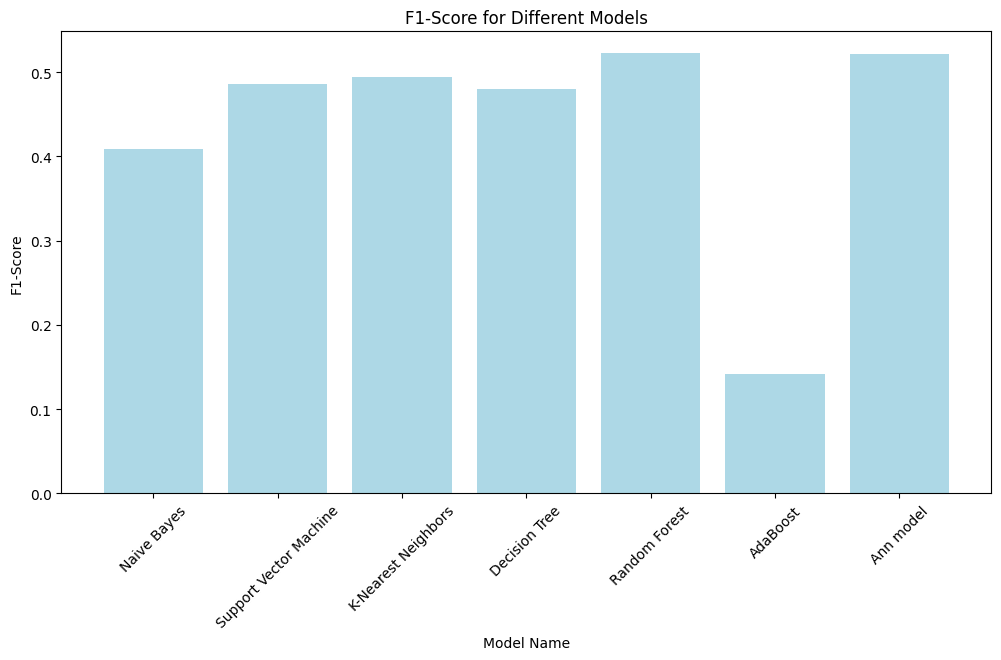

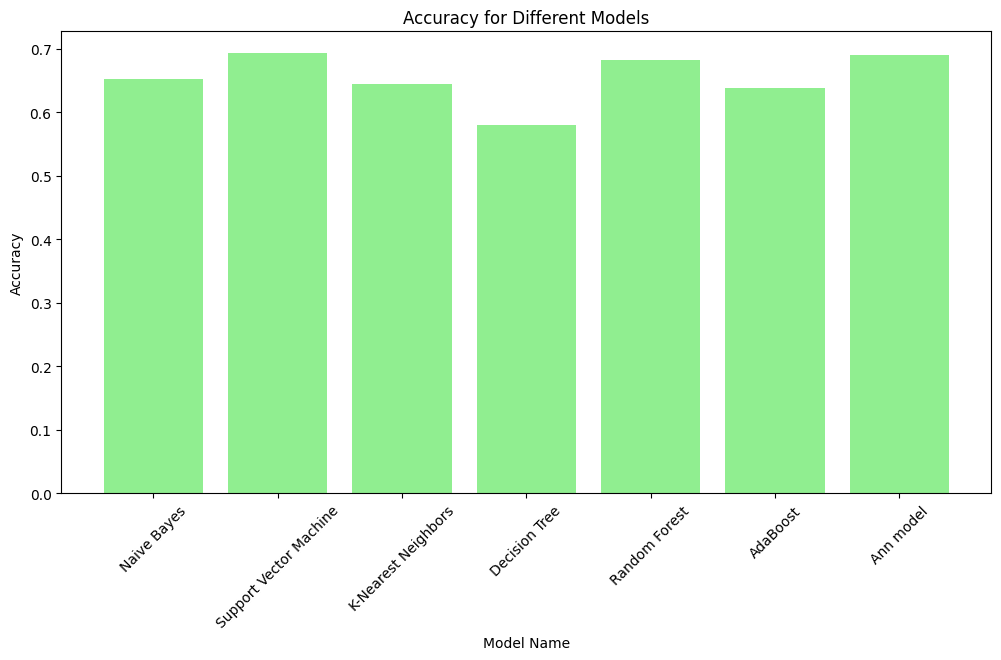

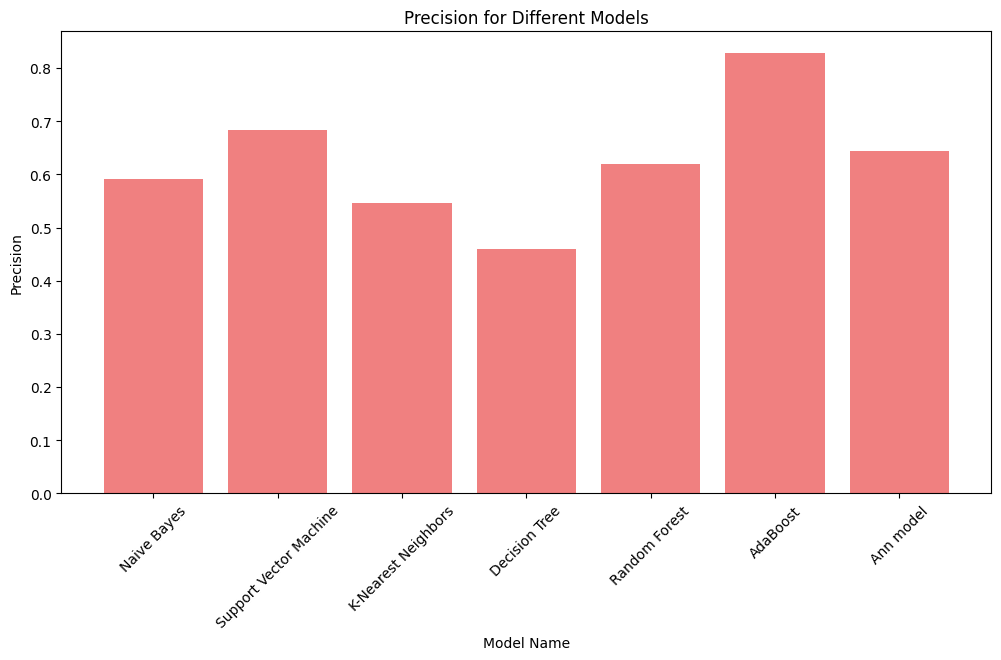

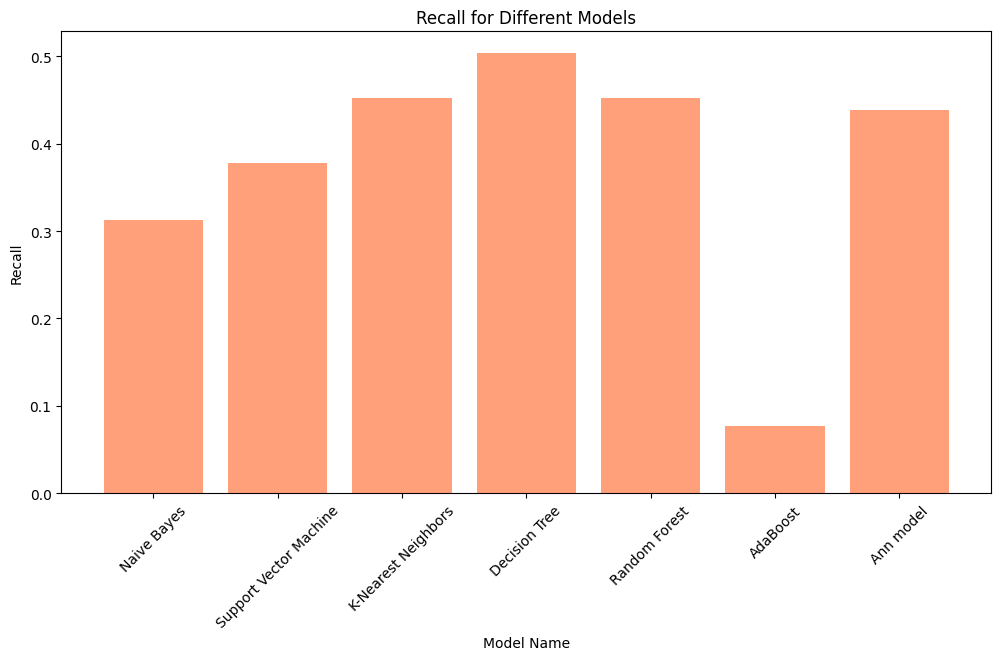

In [ ]:
from sklearn.metrics import classification_report

# Initialize dictionaries to store metrics for each model
precision_dict = {}
recall_dict = {}
f1_dict = {}
accuracy_dict = {}

# Iterate through models and calculate metrics
for name, model in models.items():
    if name == 'Ann model':
        y_pred = (model.predict(X_test) > 0.5).astype(int)
    else:
        y_pred = model.predict(X_test)

    # Calculate classification report
    report = classification_report(Y_test, y_pred, target_names=['0', '1'], output_dict=True)

    # Store metrics in dictionaries
    precision_dict[name] = report['1']['precision']
    recall_dict[name] = report['1']['recall']
    f1_dict[name] = report['1']['f1-score']
    accuracy_dict[name] = report['accuracy']

# Bar chart for F1-score
plt.figure(figsize=(12, 6))
plt.bar(f1_dict.keys(), f1_dict.values(), color='lightblue')
plt.xlabel('Model Name')
plt.ylabel('F1-Score')
plt.title('F1-Score for Different Models')
plt.xticks(rotation=45)
plt.show()

# Bar chart for Accuracy
plt.figure(figsize=(12, 6))
plt.bar(accuracy_dict.keys(), accuracy_dict.values(), color='lightgreen')
plt.xlabel('Model Name')
plt.ylabel('Accuracy')
plt.title('Accuracy for Different Models')
plt.xticks(rotation=45)
plt.show()

# Bar chart for Precision
plt.figure(figsize=(12, 6))
plt.bar(precision_dict.keys(), precision_dict.values(), color='lightcoral')
plt.xlabel('Model Name')
plt.ylabel('Precision')
plt.title('Precision for Different Models')
plt.xticks(rotation=45)
plt.show()

# Bar chart for Recall
plt.figure(figsize=(12, 6))
plt.bar(recall_dict.keys(), recall_dict.values(), color='lightsalmon')
plt.xlabel('Model Name')
plt.ylabel('Recall')
plt.title('Recall for Different Models')
plt.xticks(rotation=45)
plt.show()


In [ ]:
import prettytable
from sklearn.metrics import classification_report
from prettytable import PrettyTable

# Initialize PrettyTable
table = PrettyTable()
table.field_names = ["Model", "Accuracy", "Precision", "Recall", "F1-Score"]

# Iterate through models and calculate metrics
for name, model in models.items():
    if name == 'Ann model':
        y_pred = (model.predict(X_test) > 0.5).astype(int)
    else:
        y_pred = model.predict(X_test)

    # Calculate classification report
    report = classification_report(Y_test, y_pred, target_names=['0', '1'], output_dict=True)

    # Add row to the table
    table.add_row([name, report['accuracy'], report['1']['precision'], report['1']['recall'], report['1']['f1-score']])

# Print the table
print(table)


26/26 [==============================] - 0s 2ms/step
+------------------------+--------------------+--------------------+---------------------+---------------------+
|         Model          |      Accuracy      |     Precision      |        Recall       |       F1-Score      |
+------------------------+--------------------+--------------------+---------------------+---------------------+
|      Naive Bayes       | 0.6521739130434783 | 0.5914634146341463 | 0.31290322580645163 |  0.409282700421941  |
| Support Vector Machine | 0.6931677018633541 | 0.6842105263157895 |  0.3774193548387097 | 0.48648648648648657 |
|  K-Nearest Neighbors   | 0.6447204968944099 |      0.546875      | 0.45161290322580644 |  0.4946996466431095 |
|     Decision Tree      | 0.5801242236024845 | 0.4588235294117647 |  0.5032258064516129 | 0.48000000000000004 |
|     Random Forest      | 0.6819875776397516 | 0.6194690265486725 | 0.45161290322580644 |  0.5223880597014925 |
|        AdaBoost        | 0.63850931677018